Используя данные о выборке, постройте типичный портрет целевого клиента компании
(пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).
Таким образом после вашего анализа, я хочу увидеть небольшое описание нашего целевого клиента с соответствующими визуализациями, что мы прошли с вами на лекции.

In [263]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-whitegrid')
font = {'family' : ' DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

import pathlib
from pathlib import Path
dir_path = pathlib.Path.home()
path = Path(dir_path, 'PycharmProjects', 'homework2',  'data', 'clients.csv')
df = pd.read_csv(path).copy()
df.head(10)


,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,Entity,Name,Surname,Age at time of purchase,Age Interval,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,Individual,Lara,Carrillo,22.0,18-25,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,Individual,Donavan,Flowers,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,Individual,Darien,Dorsey,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,Individual,Alessandra,Perry,25.0,18-25,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency
5,3011,3,2007,9,Apartment,11,675.19,"$ 203,491.85",Sold,C0125,Individual,Kaitlin,Owen,26.0,26-35,1981.0,12.0,26.0,F,USA,Virginia,Investment,5,No,Client
6,3026,3,2007,9,Apartment,26,670.89,"$ 212,520.83",Sold,C0125,Individual,Kaitlin,Owen,26.0,26-35,1981.0,12.0,26.0,F,USA,Virginia,Investment,5,No,Agency
7,3023,3,2008,1,Apartment,23,720.81,"$ 198,591.85",Sold,C0166,Individual,Terry,Forbes,26.0,26-35,1982.0,5.0,27.0,M,USA,California,Home,5,No,Client
8,1031,1,2006,6,Apartment,31,782.25,"$ 265,467.68",Sold,C0034,Individual,Kole,Shannon,27.0,26-35,1979.0,6.0,27.0,M,USA,Arizona,Home,2,Yes,Website
9,4023,4,2006,3,Apartment,23,794.52,"$ 235,633.26",Sold,C0170,Individual,Emmy,Singh,27.0,26-35,1979.0,12.0,3.0,F,USA,Virginia,Investment,3,Yes,Agency


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [180]:
df.columns =['id', 'building', 'year_of_sale', 'month_of_sale', 'type_of_property', 'property_number', 'area_ft', 'price', 'status', 'customer_id', 'entity', 'name', 'surname', 'age_at_time_of_purchase', 'age_interval', 'y', 'm',  'd', 'gender', 'country', 'state', 'purpose', 'deal_satisfaction', 'mortage' , 'source']


id, building, property_number - предположительно данные по объектам недвижимости из другой базы.
year_of_sale - год продажи
month_of_sale - месяц продажи
type_of_property - тип собственности (жилая недвижимость, офис)
area_ft - площадь в футах
price - цена продажи
status - статус недвижимости (поле содержит один статус "продано")
customer_id - id покупателя
entity - тип организации покупателя (физическое или юридическое лицо)
name - имя покупателя, название фирмы
surname - фамилия покупателя (для физ.лиц)
age_at_time_of_purchase - возраст покупателя на момент сделки (для физ.лиц)
age_interval - возрастной интервал физ.лиц.
'y', 'm',  'd' - год, месяц, день рождения покупателя (физ.лица)
gender - пол покупателя
country - страна происхождения
state - штат (для покупателей из США)
purpose - цель покупки
deal_satisfaction - оценка удовлетворенности сделкой
mortage - использование ипотеки для покупки
source - источник прихода клиента

Преобразуем тип данных в поле price в числовой вид


In [181]:
#data.describe('area_ft')
def clean_currency(x):
    """ Если значение является строкой, то удаляет символ валюты и разделители,
    в противном случае - значение является числовым и может быть преобразовано.
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)
df['price'] = df['price'].apply(clean_currency).astype('float')
df['price_k_usd'] = df['price']/1000
df['count_of_deals'] = 1 # счетчик сделок
df.head()

,id,building,year_of_sale,month_of_sale,type_of_property,property_number,area_ft,price,status,customer_id,entity,name,surname,age_at_time_of_purchase,age_interval,y,m,d,gender,country,state,purpose,deal_satisfaction,mortage,source,price_k_usd,count_of_deals
0,1030,1,2005,11,Apartment,30,743.09,246172.68,Sold,C0028,Individual,Madalyn,Mercer,19.0,18-25,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website,246.17268,1
1,1029,1,2005,10,Apartment,29,756.21,246331.90,Sold,C0027,Individual,Lara,Carrillo,22.0,18-25,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website,246.33190,1
2,2002,2,2007,7,Apartment,2,587.28,209280.91,Sold,C0112,Individual,Donavan,Flowers,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client,209.28091,1
3,2031,2,2007,12,Apartment,31,1604.75,452667.01,Sold,C0160,Individual,Darien,Dorsey,22.0,18-25,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website,452.66701,1
4,1049,1,2004,11,Apartment,49,1375.45,467083.31,Sold,C0014,Individual,Alessandra,Perry,25.0,18-25,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency,467.08331,1


Присвоим категориальным типам тип 'category', посмотрим что находится в этих полях

In [183]:
df = df.assign(entity=df.entity.astype('category'),
               age_interval = df.age_interval.astype('category'),
               gender = df.gender.astype('category'),
               purpose = df.purpose.astype('category'),
               customer_id = df.customer_id.astype('category'))
df.describe(include='category')


,customer_id,entity,age_interval,gender,purpose
count,195,195,178,178,195
unique,162,2,6,2,2
top,C0174,Individual,36-45,M,Home
freq,9,178,52,108,119


Посмотрим продажи по годам в разрезе типа организации покупателя (физ./юр. лица).

In [184]:
df_by_year = df.groupby(['year_of_sale', 'entity']).sum()
df_by_year = df_by_year.reset_index()
df_by_year['av_price_ft'] = df_by_year['price']/df_by_year['area_ft']
df_by_year['av_deal_price_k_usd'] = df_by_year['price_k_usd']/df_by_year['count_of_deals']
df_by_year.loc[:,['year_of_sale','entity', 'price_k_usd','av_price_ft','av_deal_price_k_usd', 'count_of_deals']]


,year_of_sale,entity,price_k_usd,av_price_ft,av_deal_price_k_usd,count_of_deals
0,2004,Firm,868.06092,289.375825,217.015230,4
1,2004,Individual,3528.94888,301.925617,294.079073,12
2,2005,Firm,2910.51540,297.658365,242.542950,12
3,2005,Individual,4304.71701,297.160055,286.981134,15
4,2006,Firm,529.31728,329.844075,529.317280,1
5,2006,Individual,10376.68330,300.463299,266.068803,39
6,2007,Firm,0.00000,NaN,NaN,0
7,2007,Individual,27451.79834,298.794108,269.135278,102
8,2008,Firm,0.00000,NaN,NaN,0
9,2008,Individual,2212.16005,296.999216,245.795561,9


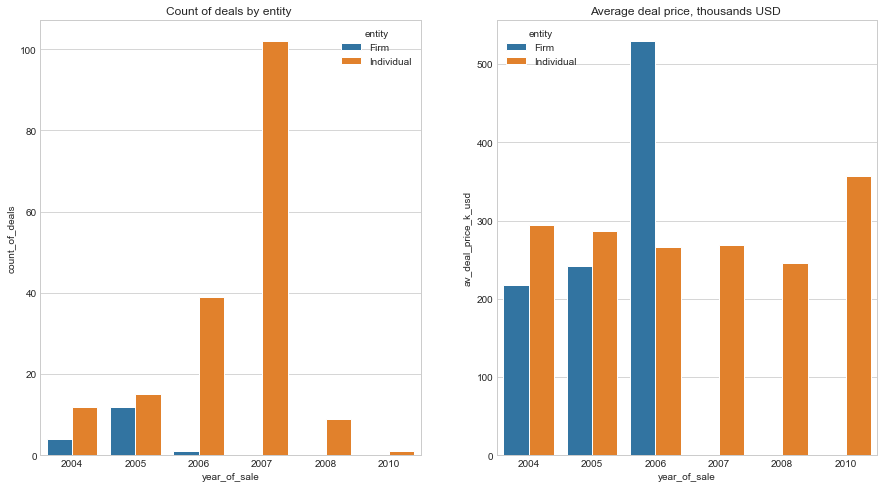

In [290]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8) )

ax1.set_title('Count of deals by entity ')
sns.barplot(x='year_of_sale', y='count_of_deals',hue='entity',  data= df_by_year, ax=ax1)

ax2.set_title('Average deal price, thousands USD ')
sns.barplot(x='year_of_sale', y='av_deal_price_k_usd',hue='entity',  data= df_by_year, ax=ax2);

Анализ сделок по годам не показывает никакой динамики: 102 из 195 сделок приходится на 2007 год
Поэтому описание портрета покупателя в динамике не имеет смысла для поставленной задачи.
Cоставим общий портрет покупателя за все годы.

In [186]:
df_by_entity = df.groupby(['entity']).sum()
df_by_entity = df_by_entity.reset_index()
df_by_entity['av_price_ft'] = df_by_entity['price']/df_by_entity['area_ft']
df_by_entity['av_deal_area'] = df_by_entity['area_ft']/df_by_entity['count_of_deals']
df_by_entity['av_deal_price_k_usd'] = df_by_entity['price_k_usd']/df_by_entity['count_of_deals']
df_by_entity.loc[:,['entity', 'count_of_deals', 'price_k_usd', 'av_deal_area', 'av_price_ft','av_deal_price_k_usd']]

,entity,count_of_deals,price_k_usd,av_deal_area,av_price_ft,av_deal_price_k_usd
0,Firm,17,4307.89360,846.032941,299.522032,253.405506
1,Individual,178,48231.84578,905.008596,299.406466,270.965426


In [188]:
df_by_entity_med = df.groupby(['entity']).median().reset_index()
df_by_entity_med.loc[:, ['entity','price_k_usd', 'area_ft']]

,entity,price_k_usd,area_ft
0,Firm,222.94721,775.69
1,Individual,245.19673,792.53


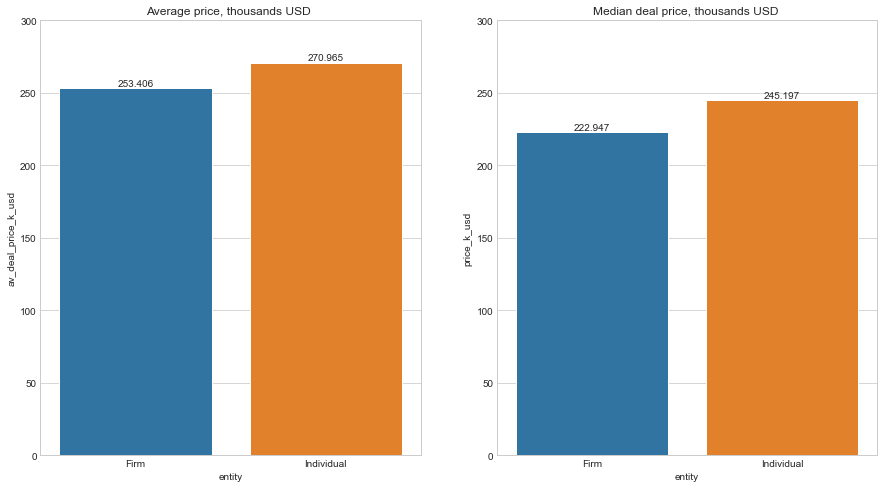

In [292]:

f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
ax1.set_title('Average price, thousands USD ')
ax1.set_ylim([0,300])
sns.barplot(x='entity', y='av_deal_price_k_usd',  data= df_by_entity, ax=ax1, errwidth=1)
ax1.bar_label(ax1.containers[0])

ax2.set_title('Median deal price, thousands USD ')
ax2.set_ylim([0,300])
sns.barplot(x='entity', y='price_k_usd',  data= df_by_entity_med, ax=ax2, errwidth=1)
ax2.bar_label(ax2.containers[0]);

In [194]:
df.describe()['price_k_usd']

count    195.000000
mean     269.434561
std       80.129094
min      117.564070
25%      212.393250
50%      243.052590
75%      308.550875
max      529.317280
Name: price_k_usd, dtype: float64

In [12]:
df_by_entity_property = df.groupby(['entity', 'type_of_property']).sum()
df_by_entity_property = df_by_entity_property.reset_index()
df_by_entity_property['av_price_ft'] = df_by_entity_property['price']/df_by_entity_property['area_ft']
df_by_entity_property['av_deal_area'] = df_by_entity_property['area_ft']/df_by_entity_property['count_of_deals']
df_by_entity_property['av_deal_price_k_usd'] = df_by_entity_property['price_k_usd']/df_by_entity_property['count_of_deals']
df_by_entity_property.loc[:,['entity', 'type_of_property','count_of_deals', 'price_k_usd', 'av_deal_area', 'av_price_ft','av_deal_price_k_usd']]

,entity,type_of_property,count_of_deals,price_k_usd,av_deal_area,av_price_ft,av_deal_price_k_usd
0,Firm,Apartment,12,3139.99336,863.875833,302.897828,261.666113
1,Firm,Office,5,1167.90024,803.210000,290.808192,233.580048
2,Individual,Apartment,176,47627.25249,904.181250,299.286663,270.609389
3,Individual,Office,2,604.59329,977.815000,309.155254,302.296645


Рассчитаем медианные значения по выборке покупателей.

In [13]:
df_by_entity_med = df.groupby(['entity', 'type_of_property']).median()
df_by_entity_med = df_by_entity_med.reset_index()
df_by_entity_med.loc[:,['entity', 'type_of_property', 'price_k_usd', 'area_ft']]

,entity,type_of_property,price_k_usd,area_ft
0,Firm,Apartment,208.851940,756.210
1,Firm,Office,246.050400,800.960
2,Individual,Apartment,245.196730,792.530
3,Individual,Office,302.296645,977.815


In [14]:
df_individ = df.copy().loc[df.entity == 'Individual']
df_individ = df_individ.drop(['id', 'building', 'year_of_sale', 'month_of_sale', 'property_number', 'price', 'y','m', 'd'], axis=1)
df_individ.describe()

,area_ft,age_at_time_of_purchase,deal_satisfaction,price_k_usd,count_of_deals
count,178.000000,178.000000,178.000000,178.000000,178.0
mean,905.008596,46.151685,3.533708,270.965426,1.0
std,259.384449,12.841692,1.345211,78.525152,0.0
min,579.750000,19.000000,1.000000,153.466710,1.0
25%,738.245000,37.000000,3.000000,214.826330,1.0
50%,792.530000,45.000000,4.000000,245.196730,1.0
75%,1084.230000,55.000000,5.000000,309.387082,1.0
max,1942.500000,76.000000,5.000000,503.790230,1.0


Посмотрим распределение сделок по полу

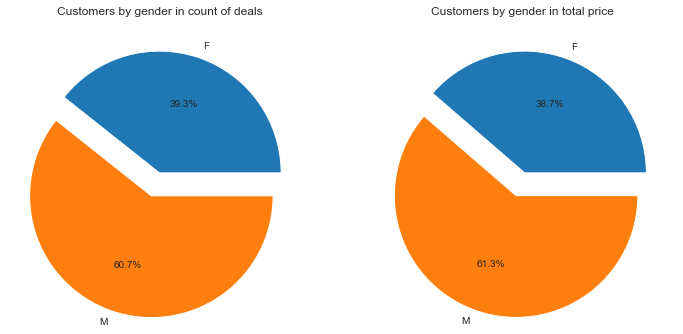

In [259]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,12) )
df_individ_gender= df_individ.groupby('gender').sum().reset_index()
gender_labels = df_individ.gender.values.unique()
ax1.pie(df_individ_gender.count_of_deals, labels=gender_labels, explode= [0, 0.2],   autopct='%1.1f%%')
ax1.set_title('Customers by gender in count of deals')
ax2.pie(df_individ_gender.price_k_usd, labels=gender_labels,explode= [0, 0.2],   autopct='%1.1f%%')
ax2.set_title('Customers by gender in total price ')
plt.show();

In [261]:
df_individ_gender['av_deal_price_k_usd'] = df_individ_gender['price_k_usd']/df_individ_gender['count_of_deals']
df_individ_gender['av_deal_area'] = df_individ_gender['area_ft']/df_individ_gender['count_of_deals']

df_individ_gender.loc[:,['gender', 'price_k_usd', 'av_deal_price_k_usd','av_deal_area','count_of_deals']]

,gender,price_k_usd,av_deal_price_k_usd,av_deal_area,count_of_deals
0,F,18643.20470,266.331496,884.324714,70
1,M,29588.64108,273.968899,918.414815,108


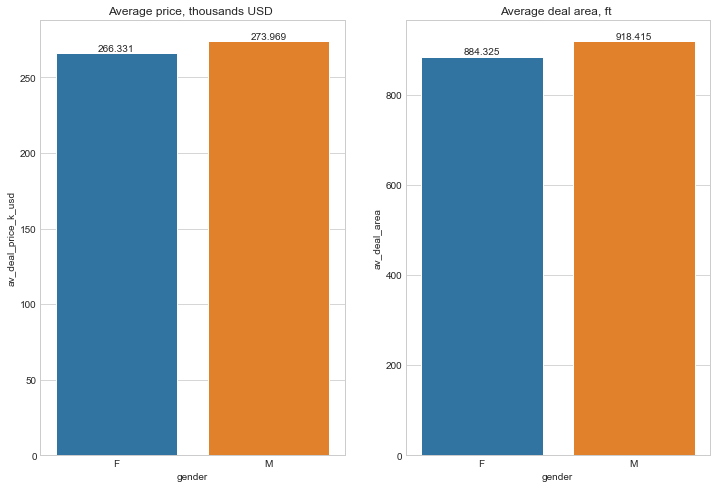

In [271]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,8))
ax1.set_title('Average price, thousands USD ')
sns.barplot(x='gender', y='av_deal_price_k_usd',  data= df_individ_gender,ax=ax1,  errwidth=0)
ax1.bar_label(ax1.containers[0])

ax2.set_title('Average deal area, ft ')
sns.barplot(x='gender', y='av_deal_area',  data= df_individ_gender, ax=ax2, errwidth=0)
ax2.bar_label(ax2.containers[0]);

Как видим, мужчины покупают недвижимость больше по площади и стоимости.

In [104]:
df_gender_property= df_individ.groupby(['gender', 'type_of_property']).sum().reset_index()
df_gender_property['av_deal_price_k_usd'] = df_gender_property['price_k_usd']/df_gender_property['count_of_deals']
df_gender_property.loc[:, ['gender', 'type_of_property' ,'price_k_usd', 'count_of_deals', 'av_deal_price_k_usd']]

,gender,type_of_property,price_k_usd,count_of_deals,av_deal_price_k_usd
0,F,Apartment,18643.20470,70,266.331496
1,F,Office,0.00000,0,NaN
2,M,Apartment,28984.04779,106,273.434413
3,M,Office,604.59329,2,302.296645


Из предложенной выборки найдены только две сделки по покупке офисных помещений (мужчинами), такое количество слишком мало для анализа и не имеет смысла. Дальнейший анализ будет проводится только для покупки жилых помещений физическими лицами.

In [105]:
df_gender_age = df_individ.groupby(['gender', 'age_interval']).sum().reset_index()
df_gender_age['av_deal_price_k_usd'] = df_gender_age['price_k_usd']/df_gender_age['count_of_deals']
df_gender_age.loc[:, ['gender', 'age_interval' ,'price_k_usd', 'count_of_deals', 'av_deal_price_k_usd']]

,gender,age_interval,price_k_usd,count_of_deals,av_deal_price_k_usd
0,F,18-25,959.58789,3,319.862630
1,F,26-35,3973.80949,15,264.920633
2,F,36-45,6278.93324,21,298.996821
3,F,46-55,2932.57170,14,209.469407
4,F,56-65,2998.63992,11,272.603629
5,F,65+,1499.66246,6,249.943743
6,M,18-25,661.94792,2,330.973960
7,M,26-35,6158.28486,21,293.251660
8,M,36-45,8540.27264,31,275.492666
9,M,46-55,7218.05431,27,267.335345


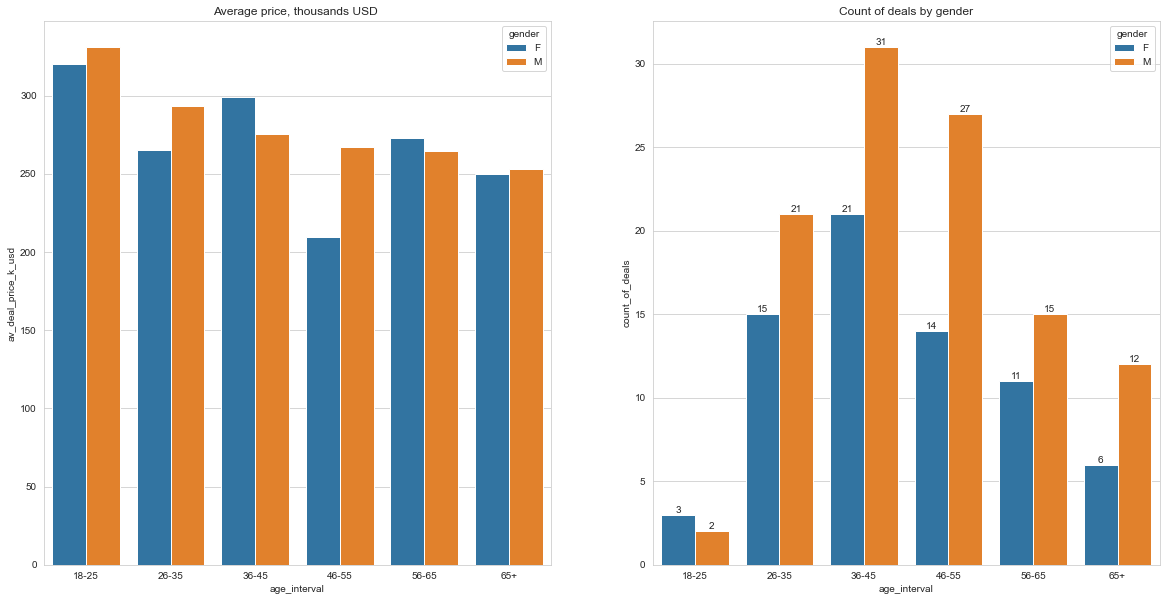

In [128]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.set_title('Average price, thousands USD ')
sns.barplot(x='age_interval', y='av_deal_price_k_usd',  data= df_gender_age,hue = 'gender', ax=ax1,  errwidth=0)


ax2.set_title('Count of deals by gender')
sns.barplot(x='age_interval', y='count_of_deals',  data= df_gender_age,hue = 'gender', ax=ax2,  errwidth=0)
ax2.bar_label(ax2.containers[0])
ax2.bar_label(ax2.containers[1]);


В возрастном разбиении по полу, ситуация аналогичная. Мужчины покупают жилье более дорогое, чем женщины.

In [245]:
df_age = df_individ.groupby(['age_interval']).sum().reset_index()
df_age['av_deal_price_k_usd'] = df_age['price_k_usd']/df_age['count_of_deals']
df_age['av_deal_area'] = df_age['area_ft']/df_age['count_of_deals']
df_age['av_price_ft'] = df_age['price_k_usd']/df_age['area_ft']*1000
df_age.loc[:, ['age_interval' ,'price_k_usd', 'count_of_deals', 'av_deal_price_k_usd', 'av_deal_area', 'av_price_ft']]

,age_interval,price_k_usd,count_of_deals,av_deal_price_k_usd,av_deal_area,av_price_ft
0,18-25,1621.53581,5,324.307162,1013.356000,320.032804
1,26-35,10132.09435,36,281.447065,937.686111,300.150618
2,36-45,14819.20588,52,284.984728,961.685769,296.338719
3,46-55,10150.62601,41,247.576244,838.300976,295.330975
4,56-65,6970.53659,26,268.097561,878.955000,305.018529
5,65+,4537.84714,18,252.102619,835.401111,301.774340


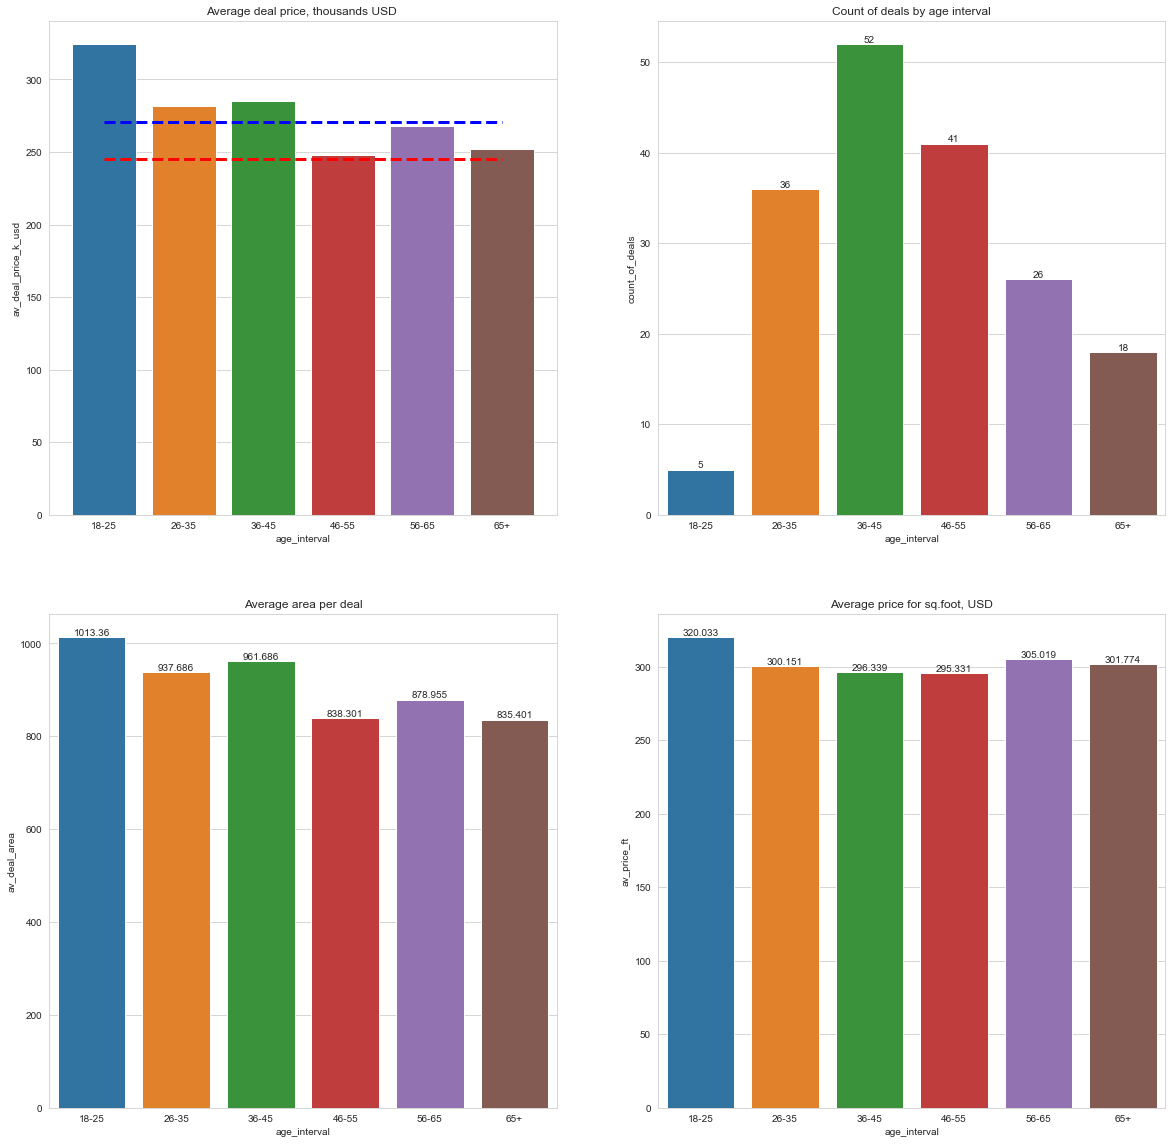

In [257]:
t, axs = plt.subplots(2,2, figsize=(20,20))
axs[0,0].set_title('Average deal price, thousands USD ')
sns.barplot(x='age_interval', y='av_deal_price_k_usd',  data= df_age, ax=axs[0,0],  errwidth=0)
axs[0,0].hlines(y = 270.96, xmin=0, xmax=5, color = 'b',linewidth = 3, linestyle = '--', label="Average deals price" )
axs[0,0].hlines(y = 245.19, xmin=0, xmax=5, color = 'r',linewidth = 3, linestyle = '--', label="Median deals price" )

axs[0,1].set_title('Count of deals by age interval')
sns.barplot(x='age_interval', y='count_of_deals',  data= df_age, ax=axs[0,1],  errwidth=0)
axs[0,1].bar_label(axs[0,1].containers[0])

axs[1,0].set_title('Average area per deal')
sns.barplot(x='age_interval', y='av_deal_area',  data= df_age, ax=axs[1,0],  errwidth=1)
axs[1,0].bar_label(axs[1,0].containers[0])

axs[1,1].set_title('Average price for sq.foot, USD')
sns.barplot(x='age_interval', y='av_price_ft',  data= df_age, ax=axs[1,1],  errwidth=1)
axs[1,1].bar_label(axs[1,1].containers[0]);

Как видим по распределению частот наиболее часто встречающаяся возрастная группа 35-45 лет, их средний чек соответствует арифметическому среднему (синяя линия) по выборке покупателей - физ.лиц. Чек Группы покупателей 46-55 лет соответствует медианной цене.
В целом по цене за единицу площади все возрастные группы примерно одинаковые, кроме 18-25.


In [283]:
df_purpose = df_individ.groupby( ['purpose']).sum().reset_index()
df_purpose['av_deal_price_k_usd'] = df_purpose['price_k_usd']/df_purpose['count_of_deals']
df_purpose

,purpose,area_ft,age_at_time_of_purchase,deal_satisfaction,price_k_usd,count_of_deals,av_deal_price_k_usd
0,Home,111601.02,5239.0,404,33259.79775,118,281.862693
1,Investment,49490.51,2976.0,225,14972.04803,60,249.534134


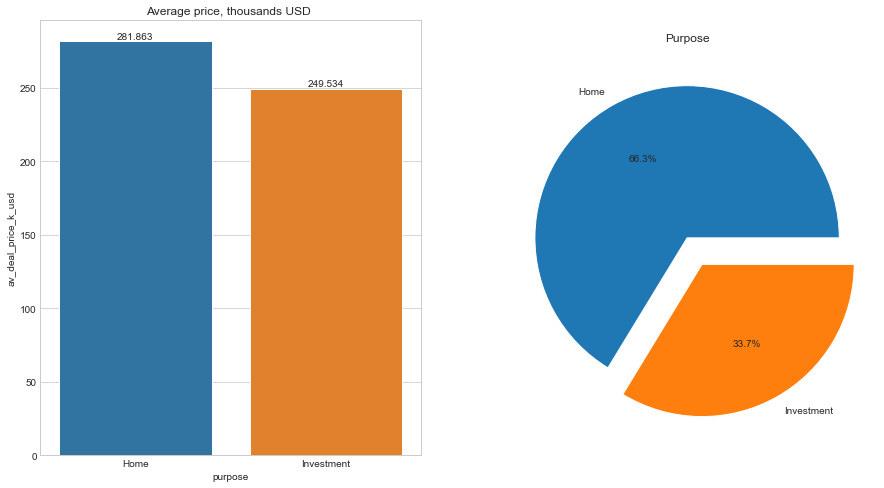

In [288]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
ax1.set_title('Average price, thousands USD ')
sns.barplot(x='purpose', y='av_deal_price_k_usd',  data= df_purpose, ax=ax1,  errwidth=0)
ax1.bar_label(ax1.containers[0])

ax2.set_title('Purpose')
purp_labels = df_purpose.purpose.unique()
ax2.pie(df_purpose.count_of_deals, labels=purp_labels, explode= [0,0.2],   autopct='%1.1f%%');


In [233]:
df_source = df.groupby(['source']).sum().reset_index()
df_source['av_deal_price_k_usd'] = df_source['price_k_usd']/df_source['count_of_deals']
df_source.loc[:['source',]]

,source,id,building,year_of_sale,month_of_sale,property_number,area_ft,price,age_at_time_of_purchase,y,m,d,deal_satisfaction,price_k_usd,count_of_deals,av_deal_price_k_usd
0,Agency,151729,150,118373,435,1729,51580.54,15540980.08,2541.0,113828.0,384.0,809.0,201,15540.98008,59,263.406442
1,Client,46476,46,34118,86,476,14904.87,4346737.76,689.0,33429.0,107.0,307.0,63,4346.73776,17,255.690456
2,Website,307123,304,238744,897,3124,108988.68,32652021.54,4985.0,201681.0,711.0,1634.0,439,32652.02154,119,274.386736


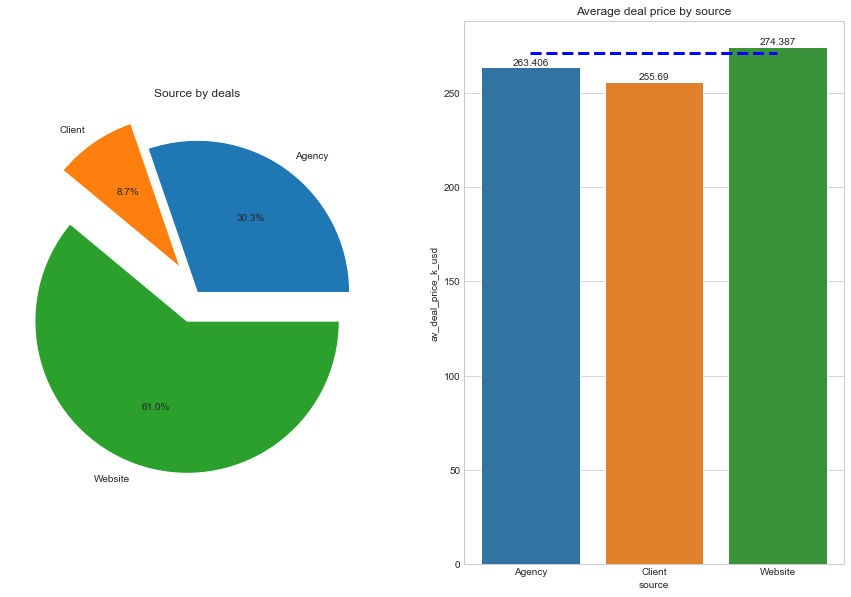

In [287]:
z, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10) )
source_labels = df_source.source.unique()
ax1.pie(df_source.count_of_deals, labels=source_labels, explode= [0,0.2, 0.2],   autopct='%1.1f%%')
ax1.set_title('Source by deals')

ax2.set_title('Average deal price by source')
sns.barplot(x='source', y='av_deal_price_k_usd',  data= df_source, ax=ax2,  errwidth=0)
ax2.bar_label(ax2.containers[0])
ax2.hlines(y = 270.96, xmin=0, xmax=2, color = 'b',linewidth = 3, linestyle = '--', label="Average deals price" )
plt.show();
